<a href="https://colab.research.google.com/github/kahakashanashraf/machine-learning/blob/main/CTGAN_Synthetic_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this post we we will talk about generating synthetic data from tabular data using Generative adversarial networks(GANs). We will be using the default implementation of [CTGAN](https://github.com/sdv-dev/CTGAN) [1] model.

## Introduction

In the last post on GANs we saw how to generate synthetic data on Synthea dataset. Here's a link to the post for a refresher:

https://www.maskaravivek.com/post/gan-synthetic-data-generation/

Similar to the last post, we would be working with the Synthea dataset which is publicly available.

https://synthetichealth.github.io/synthea/

In this post, we will be working on the `patients.csv` file and will only be using continious and categorical fields. We will remove the other fields like name, email ID etc which contains a lot of unique values and will thus will be difficult to learn.

## Data Preprocessing

Firstly, download the publicly available synthea dataset and unzip it.

In [ ]:
!wget https://storage.googleapis.com/synthea-public/synthea_sample_data_csv_apr2020.zip
!unzip synthea_sample_data_csv_apr2020.zip

--2020-12-19 02:11:12--  https://storage.googleapis.com/synthea-public/synthea_sample_data_csv_apr2020.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 173.194.69.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8982431 (8.6M) [application/zip]
Saving to: ‘synthea_sample_data_csv_apr2020.zip.1’

synthea_sample_data 100%[===================>]   8.57M  --.-KB/s    in 0.05s   

2020-12-19 02:11:12 (177 MB/s) - ‘synthea_sample_data_csv_apr2020.zip.1’ saved [8982431/8982431]

Archive:  synthea_sample_data_csv_apr2020.zip
replace csv/medications.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Install Dependencies

In this post, we will be using the default implementation of CTGAN which is available here.

https://github.com/sdv-dev/CTGAN

To use CTGAN do a pip install. Also, we will be installing the `table_evaluator` library([link](https://pypi.org/project/table-evaluator/)) which will help us in comparing the results with the original data.

In [ ]:
!pip install ctgan
!pip install table_evaluator

### Remove unnecessary columns and encode all data

Next, we read the data into a dataframe and drop the unnecessary columns.

In [ ]:
import pandas as pd

data = pd.read_csv('csv/patients.csv')
data.drop(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'ADDRESS', 'LAST', 'SUFFIX', 'MAIDEN','LAT', 'LON',], axis=1, inplace=True)
print(data.columns)

Index(['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [ ]:
categorical_features = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'ZIP']

## Training the model

Next, we simply define an instance of `CTGANSynthesizer` and call the `fit` method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [ ]:
from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer(verbose=True)
ctgan.fit(data, categorical_features, epochs = 300)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Epoch 1, Loss G:  2.4879,Loss D: -0.0099
Epoch 2, Loss G:  2.2635,Loss D: -0.0401
Epoch 3, Loss G:  2.5938,Loss D: -0.0740
Epoch 4, Loss G:  2.7833,Loss D: -0.1362
Epoch 5, Loss G:  2.4942,Loss D: -0.1926
Epoch 6, Loss G:  2.6563,Loss D: -0.2479
Epoch 7, Loss G:  2.7210,Loss D: -0.2792
Epoch 8, Loss G:  2.6284,Loss D: -0.2933
Epoch 9, Loss G:  2.7741,Loss D: -0.2877
Epoch 10, Loss G:  2.7632,Loss D: -0.2778
Epoch 11, Loss G:  2.5363,Loss D: -0.3077
Epoch 12, Loss G:  2.6440,Loss D: -0.3004
Epoch 13, Loss G:  2.5952,Loss D: -0.2995
Epoch 14, Loss G:  2.5187,Loss D: -0.2733
Epoch 15, Loss G:  2.6033,Loss D: -0.2898
Epoch 16, Loss G:  2.7202,Loss D: -0.2768
Epoch 17, Loss G:  2.5377,Loss D: -0.2353
Epoch 18, Loss G:  2.5503,Loss D: -0.3016
Epoch 19, Loss G:  2.4802,Loss D: -0.3278
Epoch 20, Loss G:  2.6661,Loss D: -0.3917
Epoch 21, Loss G:  2.6575,Loss D: -0.4012
Epoch 22, Loss G:  2.7809,Loss D: -0.3408
Epoch 23, Loss G:  2.6592,Loss D: -0.4193
Epoch 24, Loss G:  2.7966,Loss D: -0.3869
E

## Evaluation

Next, we simply call model's `sample` function to generate samples based on the learned model. In this example we generate 1000 samples.

In [ ]:
samples = ctgan.sample(1000)

print(samples.head())

  MARITAL    RACE  ... HEALTHCARE_EXPENSES HEALTHCARE_COVERAGE
0       S   asian  ...        7.331230e+05         8940.917593
1     NaN   white  ...        1.540945e+06         3099.605568
2     NaN   asian  ...        1.517647e+06        11947.241606
3     NaN   white  ...        1.516137e+06        14091.349082
4       S  native  ...        1.534122e+06         5103.408672

[5 rows x 11 columns]


Now let's try to do a feature by feature comparision between the generated data and the actual data. We will use python's `table_evaluator` library to compare the features.

We call the `visual_evaluation` method to compare the actual data(`data`) and the generated data(`samples`).

(1171, 11) (1000, 11)


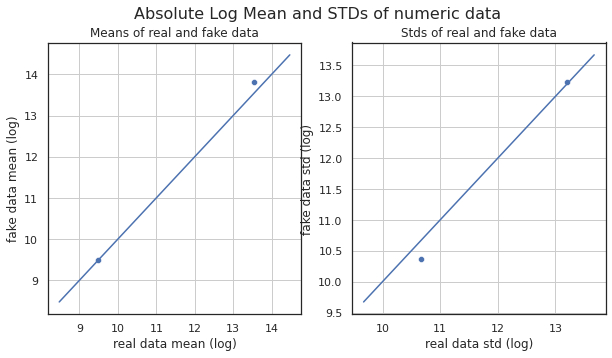

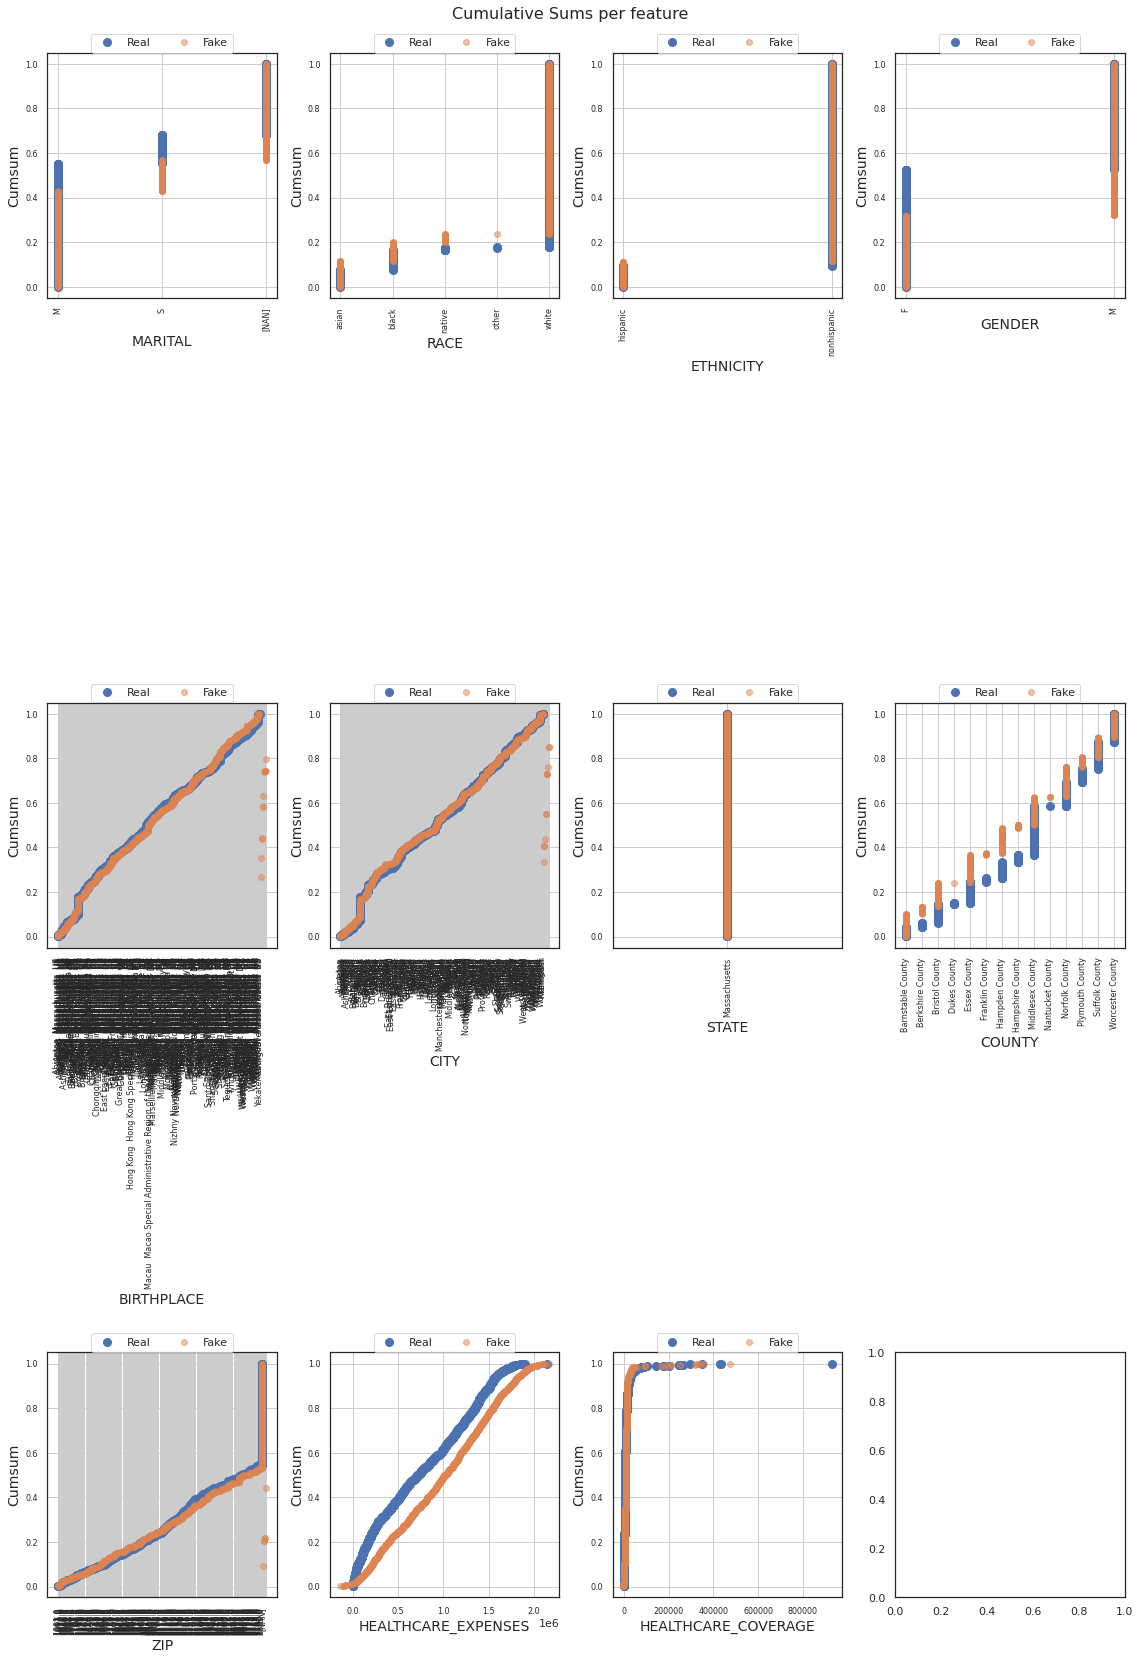

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

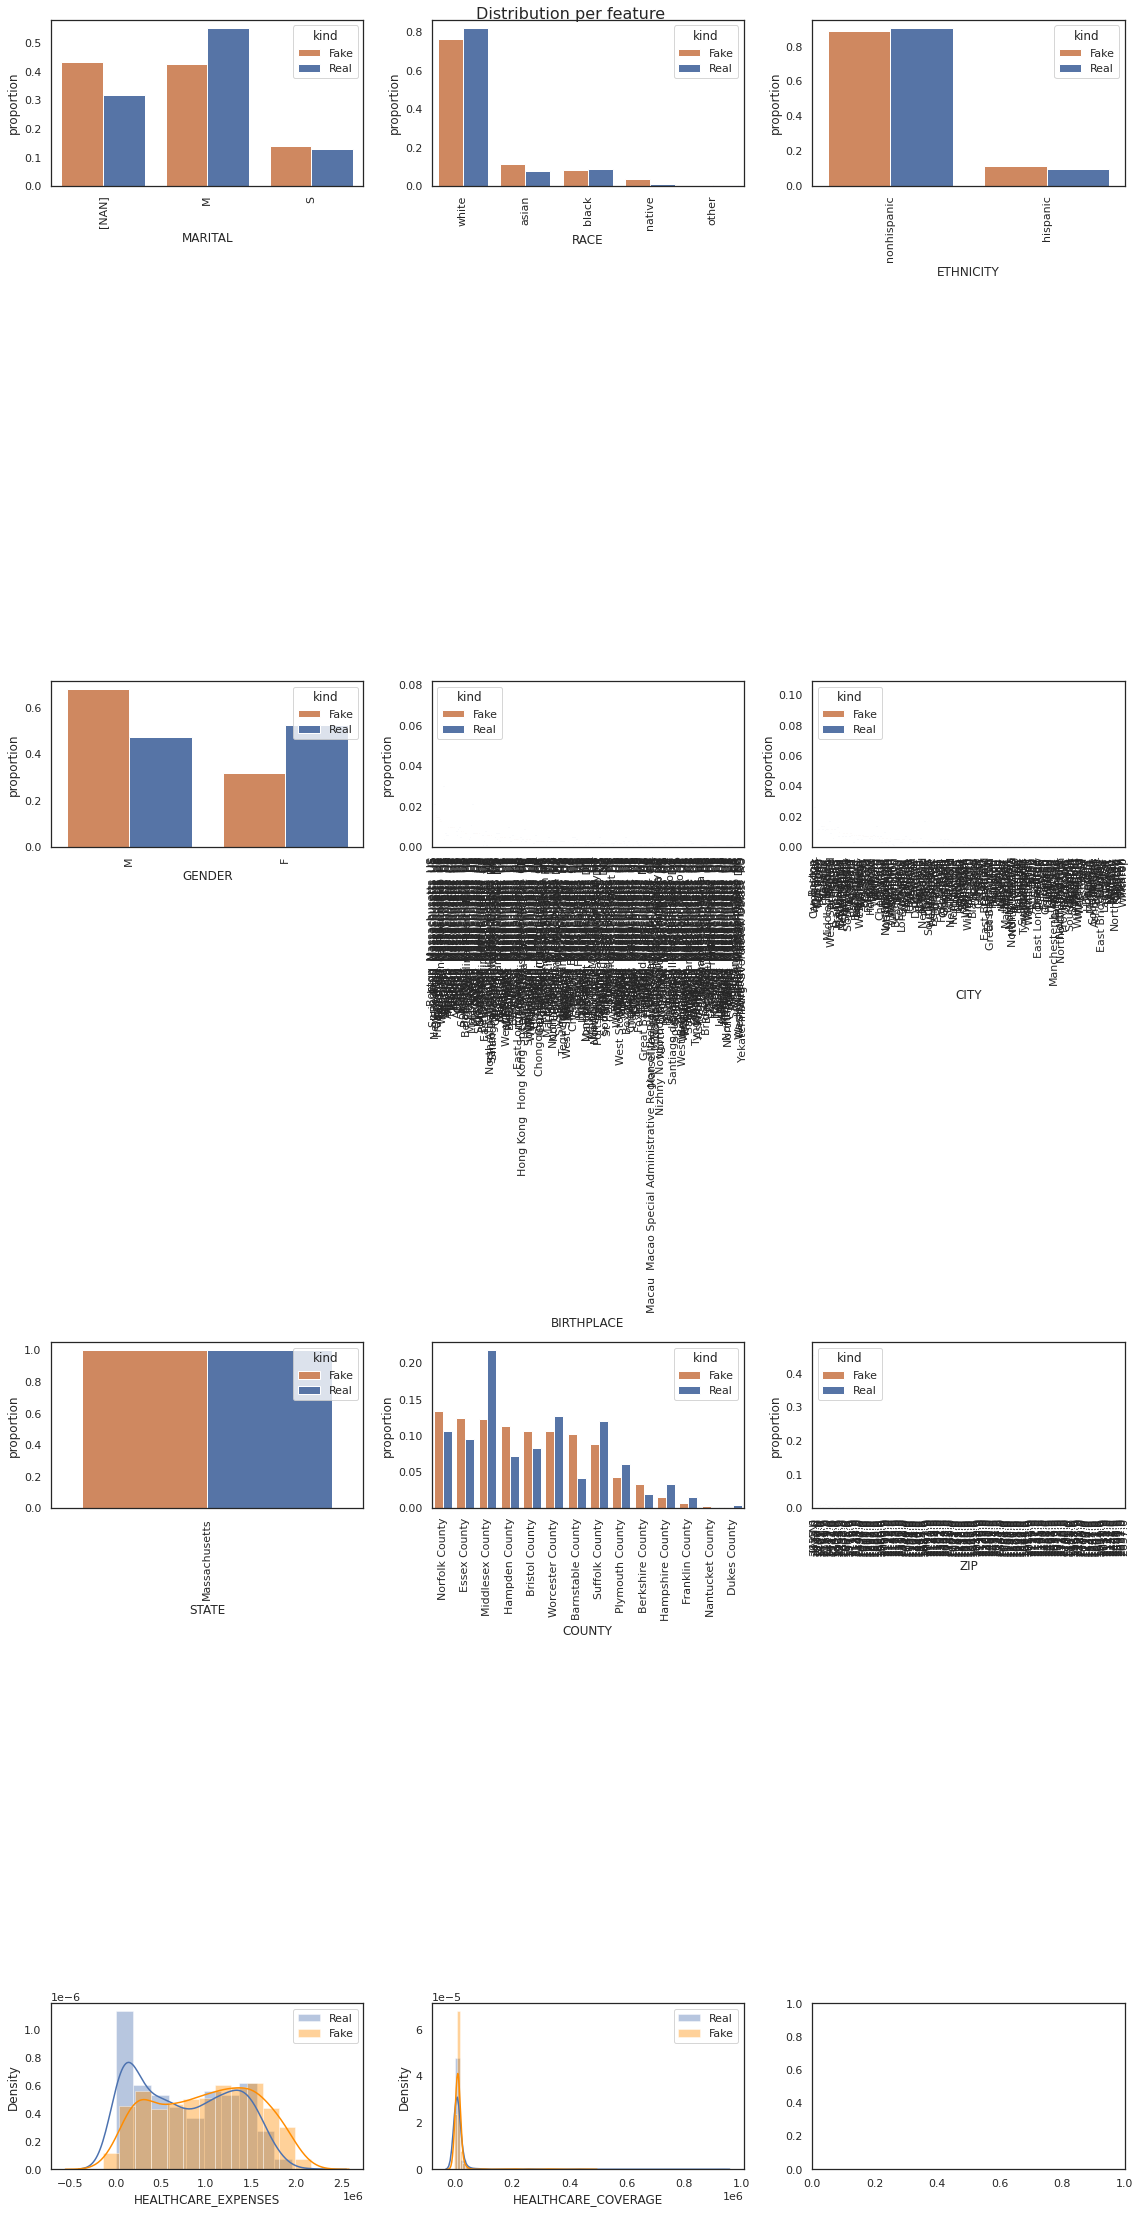

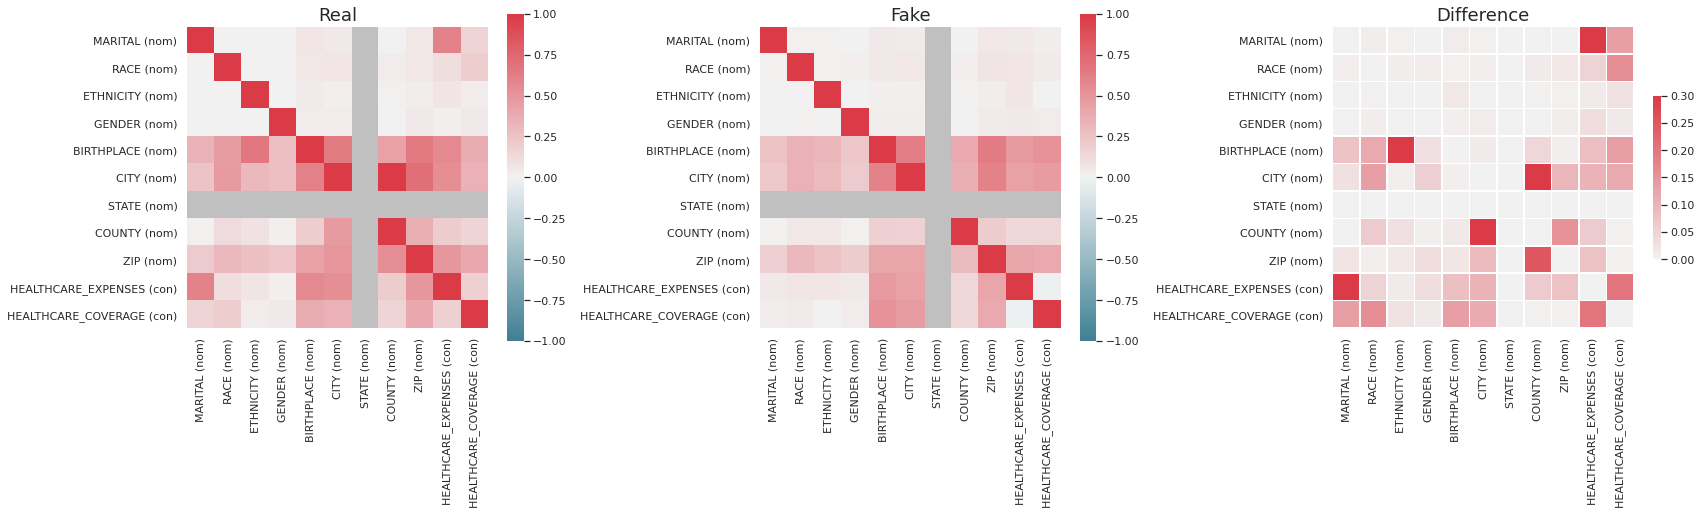

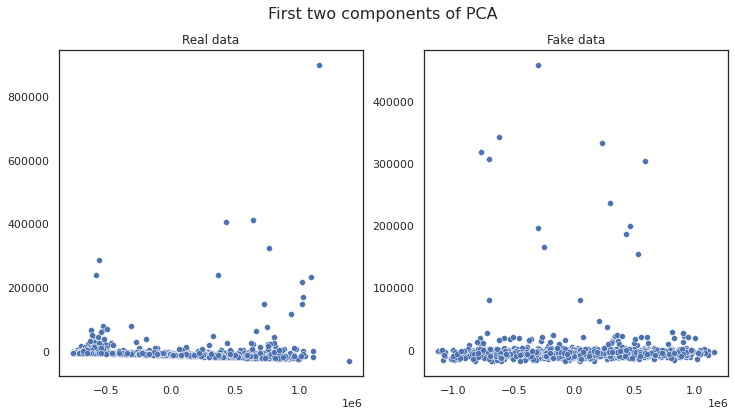

In [ ]:
from table_evaluator import load_data, TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

## Conclusion

As its apparent from the visualizations, the similarity between the original data and the synthetic data is quite high. The results give a lot of confidence as we took a random dataset and applied the default implementation without any tweaks or any data preprocessing.

The model can be used in various scenarios where data augmentation is required. Its worthwhile to highlight a few caveats:
- In this dataset we just had categorical and continuous variables and the results were quite good.
- It would be useful to try it on datasets with date time values
- Also this model won't be able to handle relational datasets by default. For eg. there's no way of specifiying primary key foreign key constraints.
- Moreover, it cannot handle contraints by default. For eg. a particular state should belong to a single country but there's no way of specifying this constraint. The generated dataset can contain new combinations of (state, country) which is not present in the original dataset.

There's a framework to mitigate some of the above issues. Checkout [SDV](https://sdv.dev/SDV/) if you are interested. I will try to write a post about it in future.

In [ ]:
## References

[1] Lei Xu, Maria Skoularidou, Alfredo Cuesta-Infante, Kalyan Veeramachaneni. Modeling Tabular data using Conditional GAN. NeurIPS, 2019